In [2]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable


#========================== Table of Contents ==========================#
# 1. Basic autograd example 1               (Line 21 to 36)
# 2. Basic autograd example 2               (Line 39 to 77)
# 3. Loading data from numpy                (Line 80 to 83)
# 4. Implementing the input pipline         (Line 86 to 113)
# 5. Input pipline for custom dataset       (Line 116 to 138)
# 6. Using pretrained model                 (Line 141 to 155)
# 7. Save and load model                    (Line 158 to 165) 

In [3]:
#======================= Basic autograd example 1 =======================#
# Create tensors with scalar value.
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.data, x.grad)    # x.grad = 2 
print(w.data, w.grad)    # w.grad = 1 
print(b.data, b.grad)    # b.grad = 1 


 1
[torch.FloatTensor of size 1]
 Variable containing:
 2
[torch.FloatTensor of size 1]


 2
[torch.FloatTensor of size 1]
 Variable containing:
 1
[torch.FloatTensor of size 1]


 3
[torch.FloatTensor of size 1]
 Variable containing:
 1
[torch.FloatTensor of size 1]



In [4]:
#======================== Basic autograd example 2 =======================#
# Create tensors.
x = Variable(torch.randn(5, 3))
y = Variable(torch.randn(5, 2))

# Build a linear layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build Loss and Optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward propagation.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.data[0])

# Backpropagation.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step Optimization (gradient descent).
optimizer.step()

# You can also do optimization at the low level as shown below.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after optimization.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.data[0])

w:  Parameter containing:
 0.0013 -0.2875 -0.3570
 0.4896 -0.2805 -0.1870
[torch.FloatTensor of size 2x3]

b:  Parameter containing:
 0.4427
 0.4774
[torch.FloatTensor of size 2]

loss:  1.2647793292999268
dL/dw:  Variable containing:
 0.3373 -0.5018  0.7344
 0.1280 -0.4281  0.5275
[torch.FloatTensor of size 2x3]

dL/db:  Variable containing:
 1.3206
 0.3641
[torch.FloatTensor of size 2]

loss after 1 step optimization:  1.2324483394622803


In [5]:
#======================== Loading data from numpy ========================#
a = np.array([[1,2], [3,4]])
b = torch.from_numpy(a)      # convert numpy array to torch tensor
c = b.numpy()                # convert torch tensor to numpy array

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [8]:
#===================== Implementing the input pipline =====================#
# Download and construct dataset.
train_dataset = dsets.CIFAR10(root='../data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=False)

# Select one data pair (read data from disk).
image, label = train_dataset[10]
print(image.shape)
print(label)

# Select mini-batch of data from dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# When iteration starts, queue and thread start to load dataset from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

print(images.shape, labels.shape)

torch.Size([3, 32, 32])
4
torch.Size([100, 3, 32, 32]) torch.Size([100])


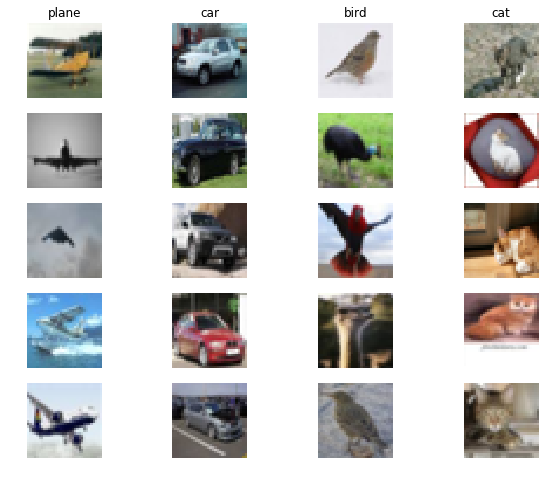

In [11]:
# Explore the CIFAR Data
X_train = 255*np.moveaxis(images.numpy(), 1, -1)
y_train = labels.numpy()

classes = ['plane', 'car', 'bird', 'cat']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
	ids = np.flatnonzero(y_train == y)
	ids = np.random.choice(ids, samples_per_class, replace=False)

	for i, idxs in enumerate(ids):
		plt_idx = i*num_classes+y+1
		plt.subplot(samples_per_class, num_classes, plt_idx)
		plt.imshow(X_train[idxs].astype('uint8'))
		plt.axis('off')
		if i == 0:
			plt.title(cls)

plt.show()

In [6]:
# Data Loader (this provides queue and thread in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# When iteration starts, queue and thread start to load dataset from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of data loader is as below.
for images, labels in train_loader:
    # Your training code will be written here
    pass


#===================== Input pipline for custom dataset =====================#
# You should build custom dataset as below.
class CustomDataset(data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file path or list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# Then, you can just use prebuilt torch's data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)


#========================== Using pretrained model ==========================#
# Download and load pretrained resnet.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only top layer of the model.
for param in resnet.parameters():
    param.requires_grad = False
    
# Replace top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is for example.

# For test.
images = Variable(torch.randn(10, 3, 256, 256))
outputs = resnet(images)
print (outputs.size())   # (10, 100)


#============================ Save and load the model ============================#
# Save and load the entire model.
torch.save(resnet, 'model.pkl')
model = torch.load('model.pkl')

# Save and load only the model parameters(recommended).
torch.save(resnet.state_dict(), 'params.pkl')
resnet.load_state_dict(torch.load('params.pkl'))

torch.Size([3, 32, 32])
6
torch.Size([10, 100])
